<a href="https://www.kaggle.com/code/theyazilimci/flight-price?scriptVersionId=92640242" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Flight Price 🛫 

<div class="alert alert-block alert-info" 
     style="font-size:16px; font-family:Helvetica;
           background: #43ABC9;
            color: white;
            border-radius: 10px;">
<font size="3">
The goal of this notebook is to predict the flight price using different method of machine learning and try to get the best results on predictions. firstly we can take observe the dataset before starting anything, what we can see is three csv file: <br> <code> Clean_Dataset -- business.csv -- economy.csv </code> <br>
<b> Clean_Dataset </b> contains business and economy flights so we'll using it to make a classification
some information can be useless in the dataset and maybe delete them can be a good idea to improve the accuracy 
    </font>
</div>
    
!["flight"](https://d1e00ek4ebabms.cloudfront.net/production/e815f822-490e-47da-a942-28114f70a585.jpg)

# Data Importation 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

### Reading Files 
<div class="alert alert-block alert-info" 
     style="font-size:16px; font-family:Helvetica;
           background: #43ABC9;
            color: white;
            border-radius: 10px;">
<font size="3">
Why Writing a function to read a file ? 
Sometime you can modify your dataset and make mistake so you'll need to get the original dataset before trying anything 
    </font>
    
</div>

In [2]:
def cleanDataSet():
    df = pd.read_csv('../input/flight-price-prediction/Clean_Dataset.csv')
    df.drop('Unnamed: 0',axis=1,inplace=True)
    return df 

def business():
    df = pd.read_csv('../input/flight-price-prediction/business.csv')
    return df 


def economy():
    df = pd.read_csv('../input/flight-price-prediction/economy.csv')
    return df 
    


#### Check if it work 

In [3]:
cleanData_df = cleanDataSet()
business_df = business()
economy_df = economy()

In [4]:
cleanData_df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
business_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [6]:
economy_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


### First approach 

<div class="alert alert-block alert-info" 
     style="font-size:16px; font-family:Helvetica;
           background: #43ABC9;
            color: white;
            border-radius: 10px;">


<font size="3">
    We can see useless information firstly in the <code> Clean_Dataset </code> there are index 1-2-3-4..... column name: <code> Unnamed: 0 </code> <br>
So we'll deleted it then we can see price information that will be very useful to compare business and economy class, the date can be useful to plot and make visualization on the data, the <code>ch_code </code> may not be too useful we'll see in the correlation heatmap. Maybe the difference in the price is too important so only by giving the price we can make a prediction 
    </font>
</div>

### Information

<div class="alert alert-block alert-info" 
     style="font-size:16px; font-family:Helvetica;
           background: #43ABC9;
            color: white;
            border-radius: 10px;">

<font size='3'> I Changed the function to delete directly the column Unnamed: 0 but the code will be paste here too </font> </div>
<code>
df = pd.read_csv('../input/flight-price-prediction/Clean_Dataset.csv')
df.drop('Unnamed: 0',axis=1)</code>
    

# Missing Values & Modifications


<div class="alert alert-block alert-info" 
     style="font-size:16px; font-family:Helvetica;
           background: #43ABC9;
            color: white;
            border-radius: 10px;">
<font size='3'>
Before making any changes are plotting something we can check for missing values in all the datasets </font>
    
</div>

In [7]:
cleanData_df.isnull().values.any(),business_df.isnull().values.any(),economy_df.isnull().values.any()

(False, False, False)

In [8]:
# replace a value in any dataset: data.replace(to_replace = np.nan, value = -99) 
len(cleanData_df),len(business_df),len(economy_df),len(business_df)+len(economy_df) == len(cleanData_df)

(300153, 93487, 206774, False)

In [9]:
cleanData_df.replace(to_replace = "zero", value = 0,inplace=True) 
cleanData_df.replace(to_replace = "one", value = 1,inplace=True) 
cleanData_df['stops'].value_counts()

1              250863
0               36004
two_or_more     13286
Name: stops, dtype: int64


<div class="alert alert-block alert-info" 
     style="font-size:16px; font-family:Helvetica;
           background: #43ABC9;
            color: white;
            border-radius: 10px;">
0 Nan Value all (columns,rows) are filles 100%  <br>
We changed the datatype of stops to int by replacing "zero" to 0 and "one" to 1 
    
</div>

# Visualization  
#### Cleaning_Dataset: Columns names 
<code>['airline', 'flight', 
'source_city', 'departure_time', 
'stops','arrival_time', 
'destination_city', 'class', 
'duration', 'days_left','price']</code>

<AxesSubplot:xlabel='class', ylabel='count'>

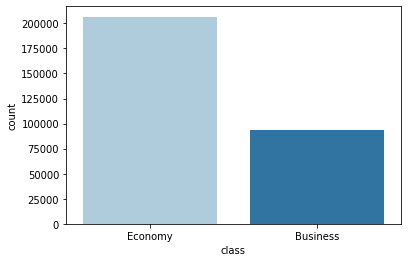

In [10]:
# Part 1 
sns.set_palette("Paired")
sns.countplot(x='class',data=cleanData_df)

<AxesSubplot:xlabel='destination_city', ylabel='count'>

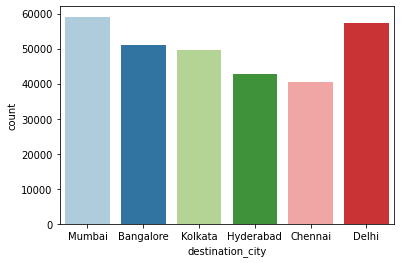

In [11]:
sns.countplot(x='destination_city',data=cleanData_df)

<AxesSubplot:xlabel='destination_city', ylabel='count'>

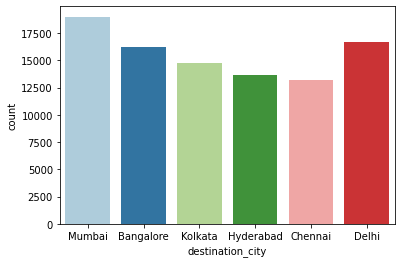

In [12]:
business_class = cleanData_df[cleanData_df['class'] == 'Business']
sns.countplot(x='destination_city',data=business_class)

In [13]:
cleanData_df = cleanDataSet()

X = cleanData_df[['price']]
y = cleanData_df['class']

In [14]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X, y)
prediction = clf.predict(X)

In [15]:
Economy = 0
Business = 0

for i in range(len(prediction)):
    if prediction[i] == "Economy":
        Economy += 1
    else:
        Business += 1
        

print(Economy,Business)

true_economy = y.value_counts().values[0]

206957 93196


<div class="alert alert-block alert-info" 
     style="font-size:16px; font-family:Helvetica;
           background: #43ABC9;
            color: white;
            border-radius: 10px;"> 
    291 Error for 300153 rows only by giving the price as X value,so we got 99% of accuracy this is due to the difference of price between business and economy class other columns can make it worse
</div>

In [16]:
abs(Economy - true_economy),y.count(),(1- (abs(Economy - true_economy) /  y.count()))*100 

(291, 300153, 99.90304944478316)